Final concentrations after soaking:
Citric Acid Soaking: 0.409
Water Soaking: 0.406
Sodium Bicarbonate Soaking: 0.389


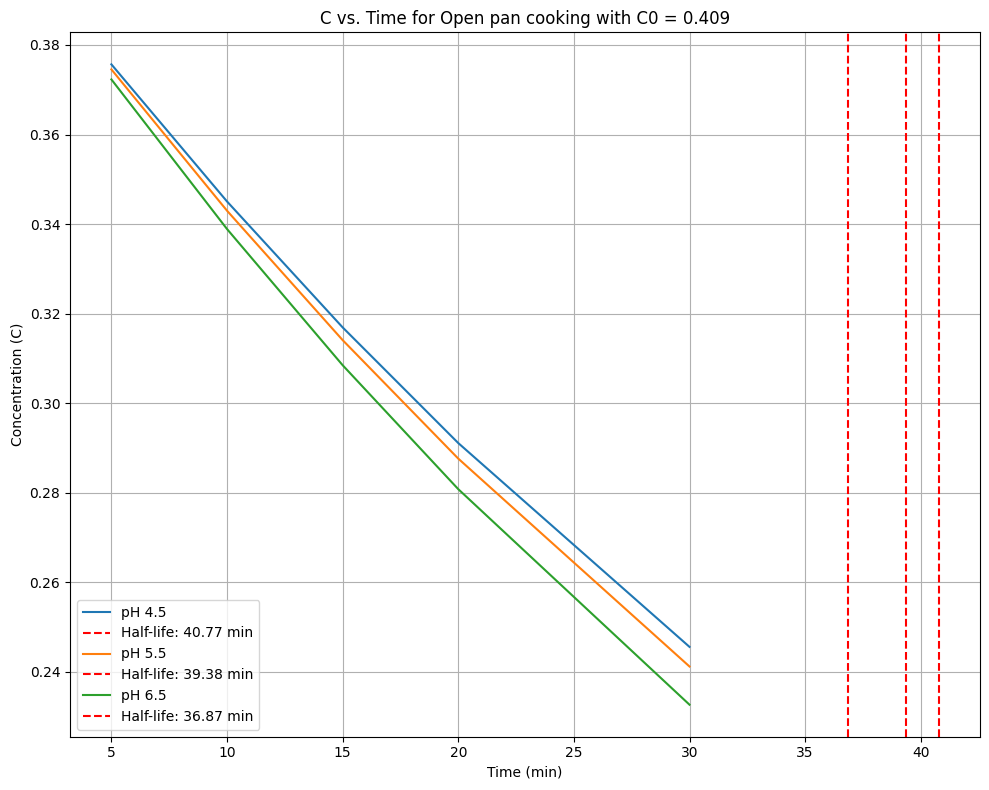

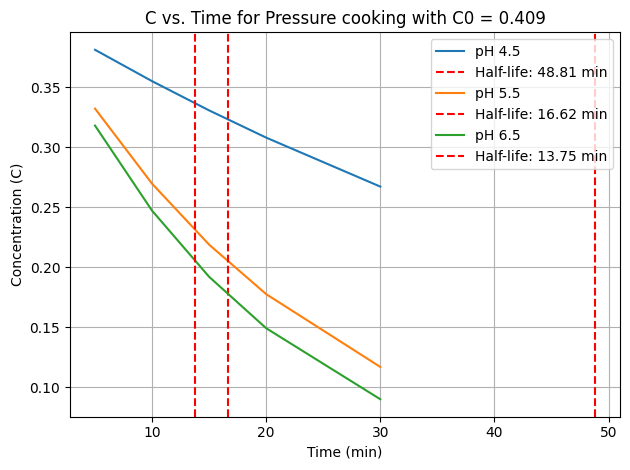

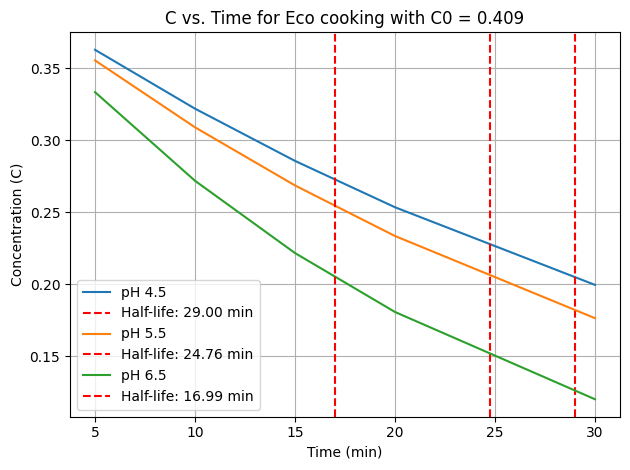

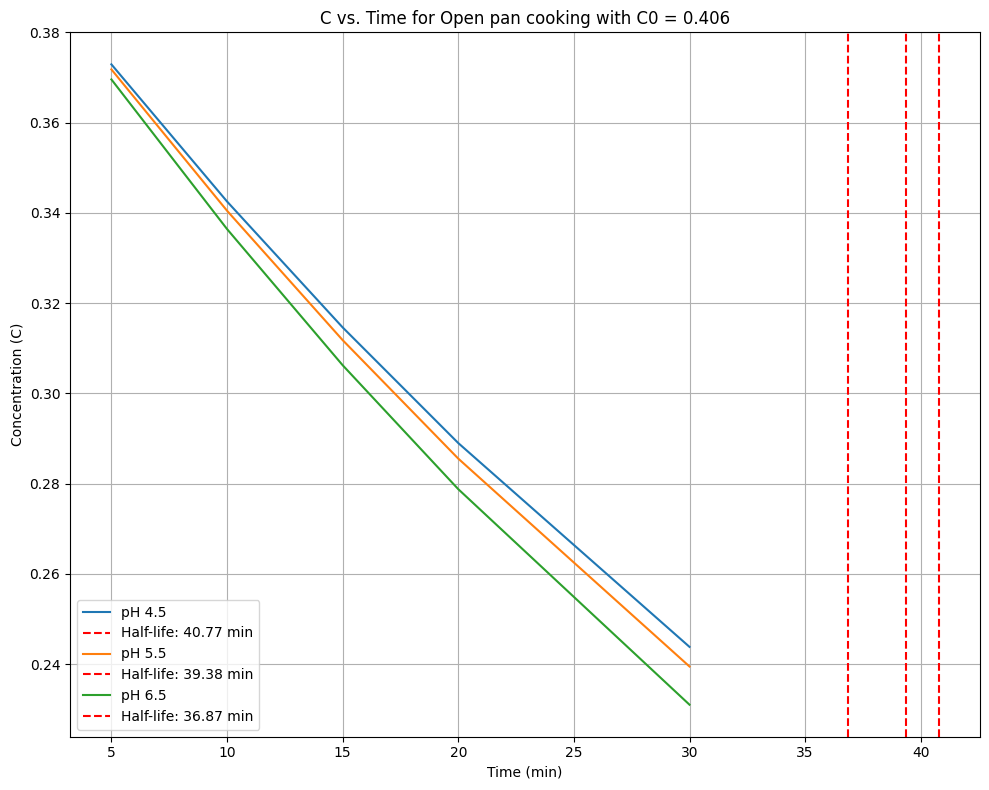

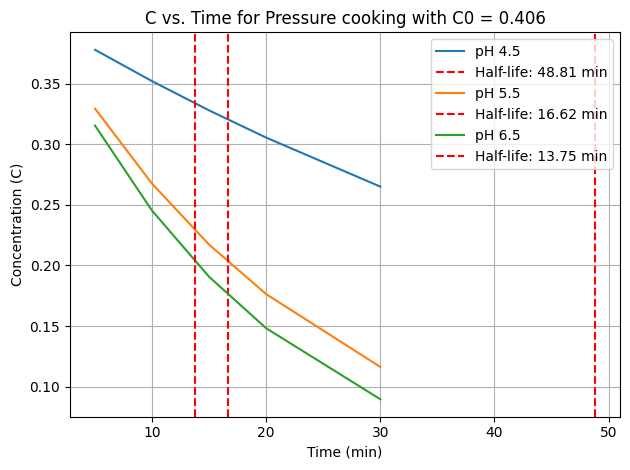

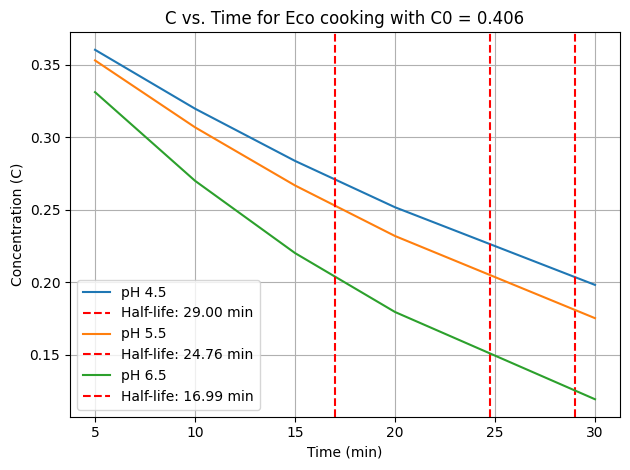

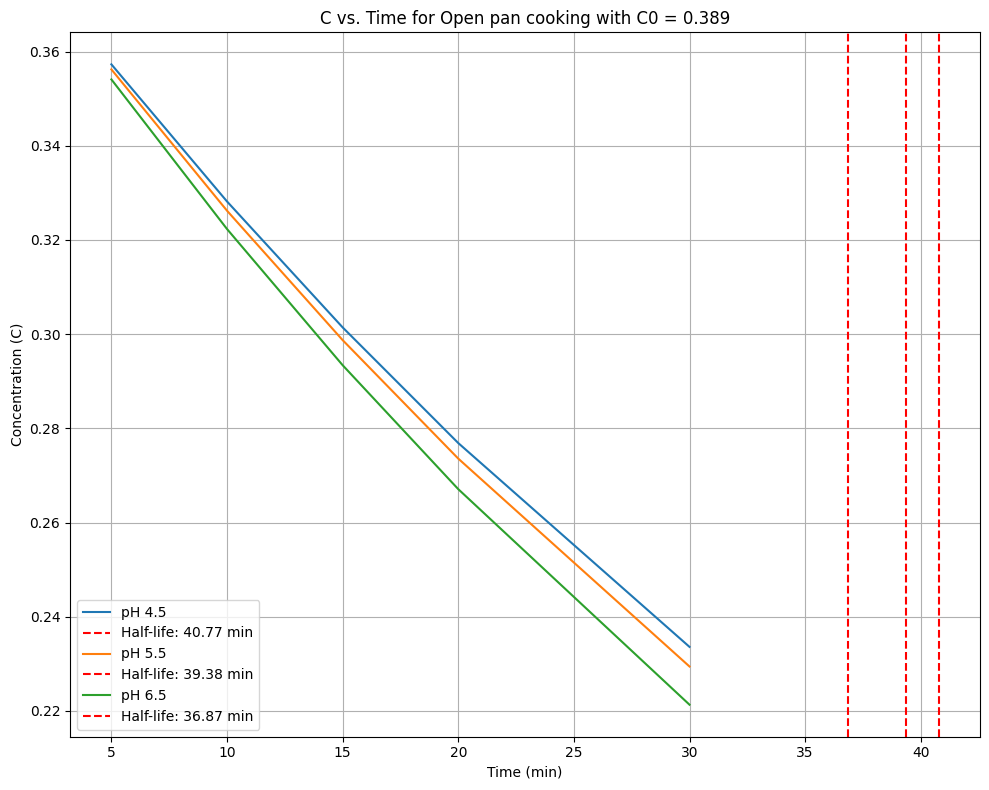

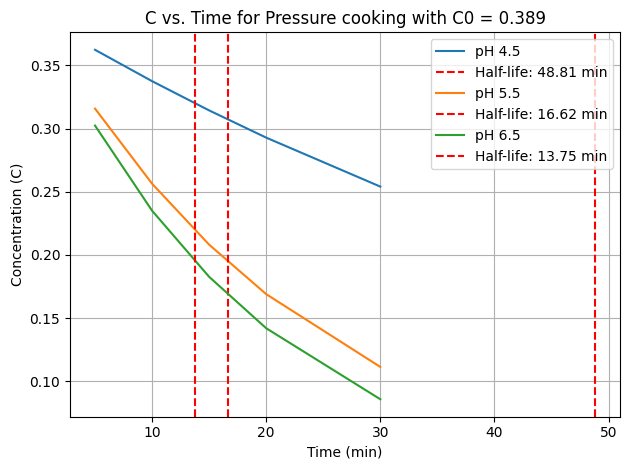

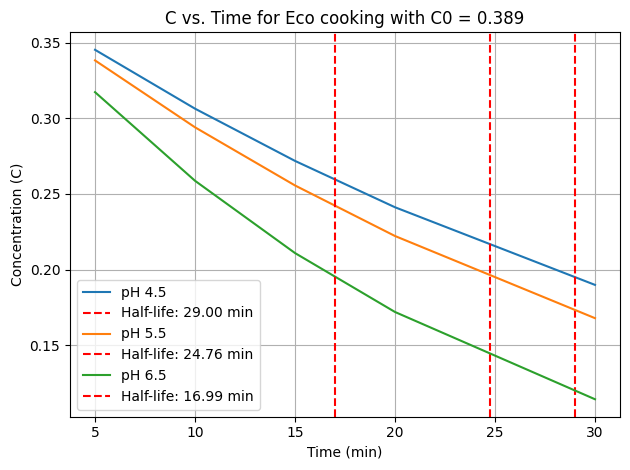

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Soaking
def thiamine_decay(t, C0, k):
    return C0 * np.exp(-k * t)

def calculate_final_concentration(initial_concentration, k):
    time_hours = np.linspace(0, 9, 100)  # Time in hours
    final_concentration = thiamine_decay(time_hours, initial_concentration, k)
    return final_concentration[-1]  # Return the final concentration at the last time point

# Rate constants for each soaking method (replace with your obtained values)
k_citric_acid = 0.006335841328854233
k_water = 0.007153840933417455
k_sodium_bicarbonate = 0.011906487153782619

# Initial concentration for soaking
initial_concentration_soaking = 0.433

# Calculate final concentration for each soaking method
final_concentration_citric_acid = calculate_final_concentration(initial_concentration_soaking, k_citric_acid)
final_concentration_water = calculate_final_concentration(initial_concentration_soaking, k_water)
final_concentration_sodium_bicarbonate = calculate_final_concentration(initial_concentration_soaking, k_sodium_bicarbonate)

# Store final concentrations in a container (list)
c_0 = [final_concentration_citric_acid, final_concentration_water, final_concentration_sodium_bicarbonate]

# Print final concentrations for verification
print("Final concentrations after soaking:")
print(f"Citric Acid Soaking: {final_concentration_citric_acid}")
print(f"Water Soaking: {final_concentration_water}")
print(f"Sodium Bicarbonate Soaking: {final_concentration_sodium_bicarbonate}")

# Cooking
# Define the function to calculate concentration at time t
def concentration(t, C0, k):
    return C0 * np.exp(-k * t)

# Define the time range for cooking
t_values = np.array([5, 10, 15, 20, 30])  # Time for cooking in minutes

# Define the rate constants (k values) for different methods, pH, and temperatures
rate_constants = {
    'Open pan cooking': {
        4.5: 0.017,
        5.5: 0.0176,
        6.5: 0.0188
    },
    'Pressure cooking': {
        4.5: 0.0142,
        5.5: 0.0417,
        6.5: 0.0504
    },
    'Eco cooking': {
        4.5: 0.0239,
        5.5: 0.028,
        6.5: 0.0408
    }
}

for c_0_value in c_0:
    plt.figure(figsize=(10, 8))
    for method, ph_k_values in rate_constants.items():
        for ph, k in ph_k_values.items():
            Ct = concentration(t_values, c_0_value, k)  # Using final concentration from soaking
            plt.plot(t_values, Ct, label=f'pH {ph}')
            
            half_concentration = c_0_value / 2
            half_life = fsolve(lambda t: concentration(t, c_0_value, k) - half_concentration, 0)[0]
            plt.axvline(x=half_life, color='r', linestyle='--', label=f'Half-life: {half_life:.2f} min')

        plt.xlabel('Time (min)')
        plt.ylabel('Concentration (C)')
        plt.title(f'C vs. Time for {method} with C0 = {c_0_value}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()